In [1]:
# img_labels & img_list - completed path to file
PATH_TO_LABELS_FILE = "../data/output_dataset/img_labels"
PATH_TO_PATHS_FILE = "../data/output_dataset/img_list"

# output convnet files path
PATH_TO_OUTPUT = "../data/output_convnet"

img_labels = []
img_list = []

with open(PATH_TO_LABELS_FILE,'r') as f_img_labels:
    for line in f_img_labels:
        img_labels.append(line[:-1]) 

with open(PATH_TO_PATHS_FILE,'r') as f_img_list:
    for line in f_img_list:
        img_list.append("../data/"+line[:-1]) # para eliminar el retorno de carro

In [2]:
from keras import backend as K
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input

Using TensorFlow backend.


In [3]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu')) # extra layer
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu')) # extra layer
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu')) # extra layer
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())

# top layer of the VGG net
model.add(Dense(4096, activation=None,name="fc1")) # activation function set to none
model.add(Dropout(0.5))
model.add(Dense(4096, activation=None,name="fc2")) # activation function set to none
model.add(Dropout(0.5))
model.add(Dense(1000, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
__________

In [4]:
model.load_weights("keras_weights/vgg19_weights_tf_dim_ordering_tf_kernels.h5")
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy')

In [5]:
import time
from sys import getsizeof
import numpy as np

deep_features = 4096
VGG19_dfmap_no_relU = np.empty((len(img_list),deep_features))

ti_dfmap_no_relU = time.time()

for index, img_path in enumerate(img_list):

    model_fc1 = Model(input=model.input, output=model.get_layer('fc1').output)

    # img preprocessing
    img = image.load_img(img_path, target_size=(224, 224), interpolation='lanczos')
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # model predict
    x = model_fc1.predict(x)
    
    VGG19_dfmap_no_relU[index,:] = np.squeeze(x, axis=0)

tf_dfmap_no_relU = time.time()    
tt_dfmap_no_relU = tf_dfmap_no_relU - ti_dfmap_no_relU
print()
print(time.strftime("%H:%M:%S", time.gmtime(tt_dfmap_no_relU)))
print()
print("Tamaño en memoria de la matriz de características profundas: {0:.2f}Mb".format(getsizeof(VGG19_dfmap_no_relU)/float(1<<20)))

/home/jon/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("ze..., outputs=Tensor("fc...)`
  if sys.path[0] == '':



00:11:02

Tamaño en memoria de la matriz de características profundas: 156.25Mb


In [6]:
# checking the output with relu funct
VGG19_dfmap_no_relU

array([[-12.85816383,   1.70101619,  -5.66680574, ...,   0.68840575,
         -1.73827255, -13.85369015],
       [ -7.01835251,   1.5618856 ,  -1.68310249, ...,   2.075881  ,
          1.29907429,  -3.83002257],
       [ -2.9649322 , -11.00621796,  -4.12966967, ...,   4.0236063 ,
          2.66481781, -11.62140751],
       ..., 
       [ -3.57469249,  -0.48270649,  -4.10341597, ...,  -1.87950706,
          1.74287355,  -0.80825788],
       [ -4.46665478,   0.357584  ,  -3.93346906, ...,  -3.63532686,
          0.51037633,   0.52646971],
       [ -3.3272655 ,   0.18737286,  -3.99520516, ...,  -3.02488995,
          0.74712926,  -0.20244092]])

Original Data no relU
    * file 156 Mb (around)
    * time 11' calcs // 0'' file (around)
    * deep features 4096
       
Original Data no relU with pca
    * file 8 Mb (around)
    * time 51'' calcs // 2'' file (around)
    * pca features 200 (aprox)


In [7]:
import pickle
import os

pickle.dump(VGG19_dfmap_no_relU, open('../data/output_convnet/VGG19/VGG19_dfmap_no_relU_pickle', 'wb'))
print(os.path.getsize("../data/output_convnet/VGG19/VGG19_dfmap_no_relU_pickle")/float(1<<20)) #156 mb

156.25015449523926


In [8]:
PATH_TO_LABELS_FILE = "../data/output_dataset"
LABELS = "img_labels"

PATH_TO_DF = "../data/output_convnet/VGG19"
DF_MAP = "VGG19_dfmap_no_relU_pickle" # without activation function

In [9]:
import os
import pickle

labels = []

with open(os.path.join(PATH_TO_LABELS_FILE,LABELS),'r') as f_img_labels:
    for line in f_img_labels:
        labels.append(line[:-1])

features = pickle.load(open(os.path.join(PATH_TO_DF,DF_MAP),'rb'))

In [10]:
import numpy as np

features_arr = np.array(features)
labels_arr = np.array(labels)

In [11]:
print("Deep features - deep feature map")
print()
print("Structure dims: {0:d} x {1:d}".format(features_arr.shape[0], features_arr.shape[1]))
print()
print("N of deep features arrays (images): ", features_arr.shape[0])
print()
print("N of deep features: ",features_arr.shape[1])
print()
print(features_arr) # array with deep features
print()
print()
print("Image's labels")
print()
print("Structure: ", type(labels_arr))
print()
print("Nº of image labels (images): ", len(labels_arr))
print()
print(labels_arr) # img's label

features_arr = features_arr.T # n x m matrix!

Deep features - deep feature map

Structure dims: 5000 x 4096

N of deep features arrays (images):  5000

N of deep features:  4096

[[-12.85816383   1.70101619  -5.66680574 ...,   0.68840575  -1.73827255
  -13.85369015]
 [ -7.01835251   1.5618856   -1.68310249 ...,   2.075881     1.29907429
   -3.83002257]
 [ -2.9649322  -11.00621796  -4.12966967 ...,   4.0236063    2.66481781
  -11.62140751]
 ..., 
 [ -3.57469249  -0.48270649  -4.10341597 ...,  -1.87950706   1.74287355
   -0.80825788]
 [ -4.46665478   0.357584    -3.93346906 ...,  -3.63532686   0.51037633
    0.52646971]
 [ -3.3272655    0.18737286  -3.99520516 ...,  -3.02488995   0.74712926
   -0.20244092]]


Image's labels

Structure:  <class 'numpy.ndarray'>

Nº of image labels (images):  5000

['01_TUMOR' '01_TUMOR' '01_TUMOR' ..., '08_EMPTY' '08_EMPTY' '08_EMPTY']


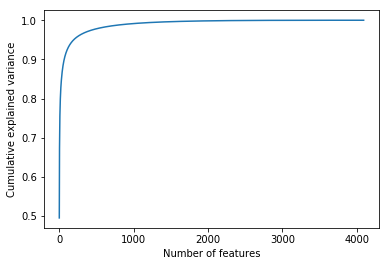

00:00:46


In [12]:
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

ti_pca = time.time()

features_model_pca = PCA().fit(features_arr) # model

# plot
plt.plot(np.cumsum(features_model_pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained variance')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb
plt.show()


tf_pca = time.time()
tt_pca = tf_pca - ti_pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_pca)))

In [13]:
# arange() does not work properly?

for i in np.arange(0.7,1,0.05):
    print("With %d features we get %f of cumulative explicative variance." % \
          (np.argmax(features_model_pca.explained_variance_ratio_.cumsum() > i), i))

With 5 features we get 0.700000 of cumulative explicative variance.
With 8 features we get 0.750000 of cumulative explicative variance.
With 15 features we get 0.800000 of cumulative explicative variance.
With 30 features we get 0.850000 of cumulative explicative variance.
With 66 features we get 0.900000 of cumulative explicative variance.
With 194 features we get 0.950000 of cumulative explicative variance.
With 4094 features we get 1.000000 of cumulative explicative variance.


In [14]:
ti_pca = time.time()

features_model_pca = PCA(n_components=200) # fixed number of features
features_model_pca.fit(features_arr)


tf_pca = time.time()
tt_pca = tf_pca - ti_pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_pca)))

00:00:02


In [15]:
pickle.dump(features_model_pca.components_.T,\
            open(os.path.join(PATH_TO_DF,"VGG19_dfmap_no_relU_pca_pickle"), 'wb')) # without relU

Data no relU  no pca (time - acc)
    * SVM -> t = 6'24'' - 89.56%
    * DCT -> t = 2'37'' - 73.06%
    * RFC -> t = 18'' - 83.19%
       
Data no relU pca
    * SVM -> t = 7'' - 89.36%
    * DCT -> t = 7'' - 73.29%
    * RFC -> t = 3'' - 76.68%

In [16]:
DF_MAP = "VGG19_dfmap_no_relU_pickle" # original data no relU no pca
DF_MAP_pca = "VGG19_dfmap_no_relU_pca_pickle" # original data no relU with pca

In [17]:
features = pickle.load(open(os.path.join(PATH_TO_DF,DF_MAP),'rb'))
features_pca = pickle.load(open(os.path.join(PATH_TO_DF,DF_MAP_pca),'rb'))

In [18]:
features_arr = np.array(features)
features_arr_pca = np.array(features_pca)
labels_arr = np.array(labels)

print("Deep features - deep feature map + relU")
print()
print("Structure dims: {0:d} x {1:d}".format(features_arr.shape[0], features_arr.shape[1]))
print()
print("N of deep features arrays (images): ", features_arr.shape[0])
print()
print("N of deep features: ",features_arr.shape[1])
print()
print(features_arr) # array with deep features
print()
print()
print("Deep features - deep feature map no relU")
print()
print("Structure dims: {0:d} x {1:d}".format(features_arr_pca.shape[0], features_arr_pca.shape[1]))
print()
print("N of deep features arrays (images): ", features_arr_pca.shape[0])
print()
print("N of deep features: ",features_arr_pca.shape[1])
print()
print(features_arr_pca) # array with deep features
print()
print()
print("Image's labels")
print()
print("Structure: ", type(labels_arr))
print()
print("Nº of image labels (images): ", len(labels_arr))
print()
print(labels_arr) # img's label

Deep features - deep feature map + relU

Structure dims: 5000 x 4096

N of deep features arrays (images):  5000

N of deep features:  4096

[[-12.85816383   1.70101619  -5.66680574 ...,   0.68840575  -1.73827255
  -13.85369015]
 [ -7.01835251   1.5618856   -1.68310249 ...,   2.075881     1.29907429
   -3.83002257]
 [ -2.9649322  -11.00621796  -4.12966967 ...,   4.0236063    2.66481781
  -11.62140751]
 ..., 
 [ -3.57469249  -0.48270649  -4.10341597 ...,  -1.87950706   1.74287355
   -0.80825788]
 [ -4.46665478   0.357584    -3.93346906 ...,  -3.63532686   0.51037633
    0.52646971]
 [ -3.3272655    0.18737286  -3.99520516 ...,  -3.02488995   0.74712926
   -0.20244092]]


Deep features - deep feature map no relU

Structure dims: 5000 x 200

N of deep features arrays (images):  5000

N of deep features:  200

[[-0.0160563   0.01408796 -0.00656668 ...,  0.01813518  0.02038482
  -0.01120627]
 [-0.0129795   0.00014379 -0.00157757 ..., -0.00119064  0.00788713
   0.01390647]
 [-0.01844774 -0.00

In [19]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import time


cv_skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=42)
# cv_kf = KFold(n_splits=5, shuffle=False, random_state=42)

# svm
SVM = LinearSVC()

ti_svm = time.time()

# data -> original dfmap no pca
scores = cross_val_score(SVM, features_arr, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred = cross_val_predict(SVM,features_arr, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat = confusion_matrix(labels_arr,y_pred)

tf_svm = time.time()
tt_svm = tf_svm - ti_svm


ti_svm_pca = time.time()

# data -> original dfmap pca
scores_pca = cross_val_score(SVM, features_arr_pca, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred_pca = cross_val_predict(SVM,features_arr_pca, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat_pca = confusion_matrix(labels_arr,y_pred_pca)

tf_svm_pca = time.time()
tt_svm_pca = tf_svm_pca - ti_svm_pca

In [20]:
# calc time
print(time.strftime("%H:%M:%S", time.gmtime(tt_svm))) # no pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_svm_pca))) # pca

00:05:33
00:00:06


In [21]:
print("Feature map sin reducción de dimensiones")
print()

for i, score in enumerate(scores):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores.mean()*100))

print()
print()

Feature map sin reducción de dimensiones

acc fold nº 1: 88.89
acc fold nº 2: 88.10
acc fold nº 3: 88.10
acc fold nº 4: 89.88
acc fold nº 5: 89.88
acc fold nº 6: 90.32
acc fold nº 7: 87.30
acc fold nº 8: 86.09
acc fold nº 9: 86.49
acc fold nº 10: 88.91

media obtenida: 88.40




In [22]:
print("Feature map con reducción de dimensiones")
print()

for i, score in enumerate(scores_pca):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores_pca.mean()*100))

Feature map con reducción de dimensiones

acc fold nº 1: 85.91
acc fold nº 2: 89.29
acc fold nº 3: 88.10
acc fold nº 4: 89.29
acc fold nº 5: 89.09
acc fold nº 6: 90.73
acc fold nº 7: 87.30
acc fold nº 8: 87.70
acc fold nº 9: 87.10
acc fold nº 10: 87.30

media obtenida: 88.18


In [23]:
# confusion matrix
conf_mat

array([[570,   6,  23,   6,  11,   8,   1,   0],
       [  2, 493,  76,   5,  41,   1,   7,   0],
       [ 32,  75, 444,  48,  17,   9,   0,   0],
       [  6,   2,  44, 565,   3,   5,   0,   0],
       [  7,  44,  18,   0, 542,   7,   7,   0],
       [ 10,   2,  16,  11,   3, 582,   1,   0],
       [  0,   0,   0,   0,   8,   1, 603,  13],
       [  0,   0,   0,   0,   0,   0,   4, 621]])

In [24]:
conf_mat_pca

array([[595,   8,   9,   4,   3,   6,   0,   0],
       [  3, 488,  82,   3,  45,   1,   3,   0],
       [ 45,  82, 435,  45,  15,   3,   0,   0],
       [  3,   3,  55, 562,   0,   2,   0,   0],
       [  6,  48,  16,   1, 542,   7,   5,   0],
       [ 10,   1,  13,  16,   4, 581,   0,   0],
       [  0,   0,   0,   0,  10,   0, 581,  34],
       [  0,   0,   0,   0,   0,   0,   0, 625]])

In [25]:
# reference http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',size=20)
    plt.xlabel('Predicted label',size=20)

In [26]:
PATH_TO_IMG = "../data/input_dataset"
class_names = sorted([folder for folder in os.listdir(PATH_TO_IMG)
                      if os.path.isdir(os.path.join(PATH_TO_IMG, folder))])

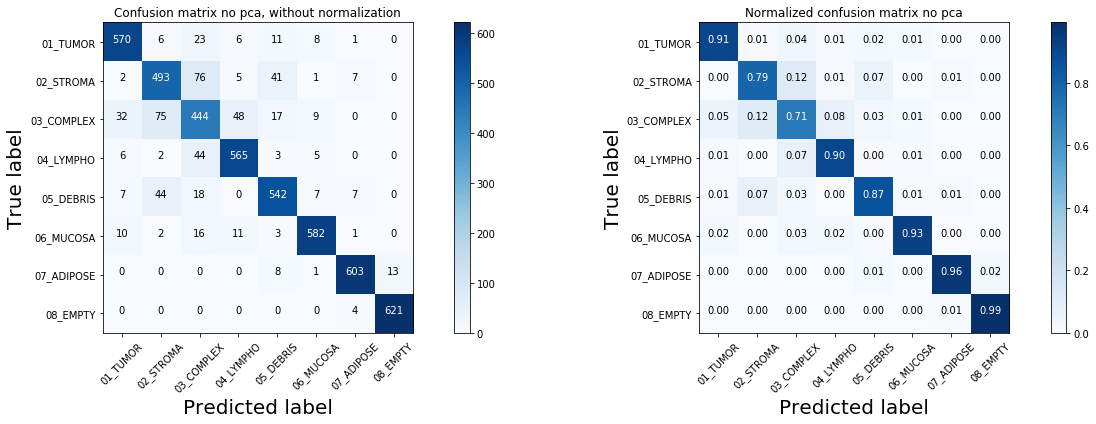

In [28]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix no pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix no pca')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_svm_no_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

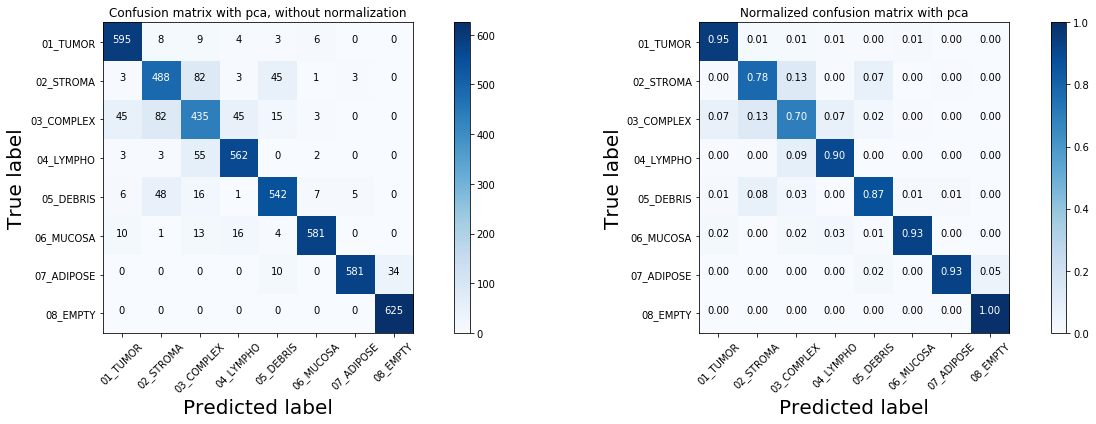

In [29]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat_pca, classes=class_names,
                      title='Confusion matrix with pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix with pca')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_svm_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

In [30]:
from sklearn.tree import DecisionTreeClassifier

# DTC
DTC = DecisionTreeClassifier()

ti_dtc = time.time()

# data -> original dfmap no pca
scores = cross_val_score(DTC, features_arr, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred = cross_val_predict(DTC,features_arr, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat = confusion_matrix(labels_arr,y_pred)

tf_dtc = time.time()
tt_dtc = tf_dtc - ti_dtc


ti_dtc_pca = time.time()

# data -> original dfmap pca
scores_pca = cross_val_score(DTC, features_arr_pca, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred_pca = cross_val_predict(DTC,features_arr_pca, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat_pca = confusion_matrix(labels_arr,y_pred_pca)

tf_dtc_pca = time.time()
tt_dtc_pca = tf_dtc_pca - ti_dtc_pca

In [31]:
# calc time
print(time.strftime("%H:%M:%S", time.gmtime(tt_dtc))) # no pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_dtc_pca))) # pca

00:02:15
00:00:06


In [32]:
print("Feature map sin reducción de dimensiones")
print()

for i, score in enumerate(scores):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores.mean()*100))

print()
print()

Feature map sin reducción de dimensiones

acc fold nº 1: 72.82
acc fold nº 2: 72.62
acc fold nº 3: 73.61
acc fold nº 4: 73.41
acc fold nº 5: 71.03
acc fold nº 6: 75.81
acc fold nº 7: 70.77
acc fold nº 8: 72.58
acc fold nº 9: 68.15
acc fold nº 10: 69.56

media obtenida: 72.03




In [33]:
print("Feature map con reducción de dimensiones")
print()

for i, score in enumerate(scores_pca):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores_pca.mean()*100))

Feature map con reducción de dimensiones

acc fold nº 1: 75.40
acc fold nº 2: 72.02
acc fold nº 3: 75.40
acc fold nº 4: 72.42
acc fold nº 5: 73.21
acc fold nº 6: 76.21
acc fold nº 7: 72.18
acc fold nº 8: 71.17
acc fold nº 9: 75.60
acc fold nº 10: 73.99

media obtenida: 73.76


In [34]:
# confusion matrix
conf_mat

array([[404,  28,  74,  19,  43,  54,   2,   1],
       [ 28, 374, 102,  12,  82,  21,   6,   0],
       [ 64, 106, 302,  68,  48,  37,   0,   0],
       [ 15,  14,  63, 505,   7,  21,   0,   0],
       [ 33,  84,  46,  19, 392,  34,  14,   3],
       [ 41,  20,  51,  26,  36, 447,   4,   0],
       [  2,   6,   2,   1,  24,   5, 570,  15],
       [  0,   0,   0,   0,   1,   0,  16, 608]])

In [35]:
conf_mat_pca

array([[417,  24,  87,  19,  31,  45,   2,   0],
       [ 21, 401,  95,  16,  70,  20,   1,   1],
       [ 81,  97, 297,  74,  34,  42,   0,   0],
       [ 16,  18,  82, 482,   6,  20,   1,   0],
       [ 27,  68,  42,  10, 444,  17,  16,   1],
       [ 39,  28,  44,  20,  34, 459,   1,   0],
       [  0,   3,   1,   0,  17,   4, 580,  20],
       [  1,   0,   0,   0,   1,   0,  15, 608]])

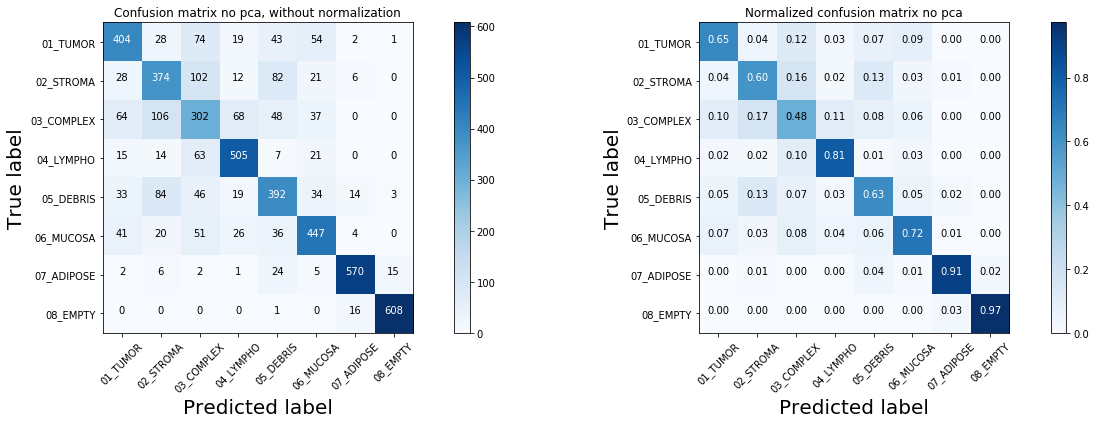

In [36]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix no pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix no pca')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_dtc_no_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

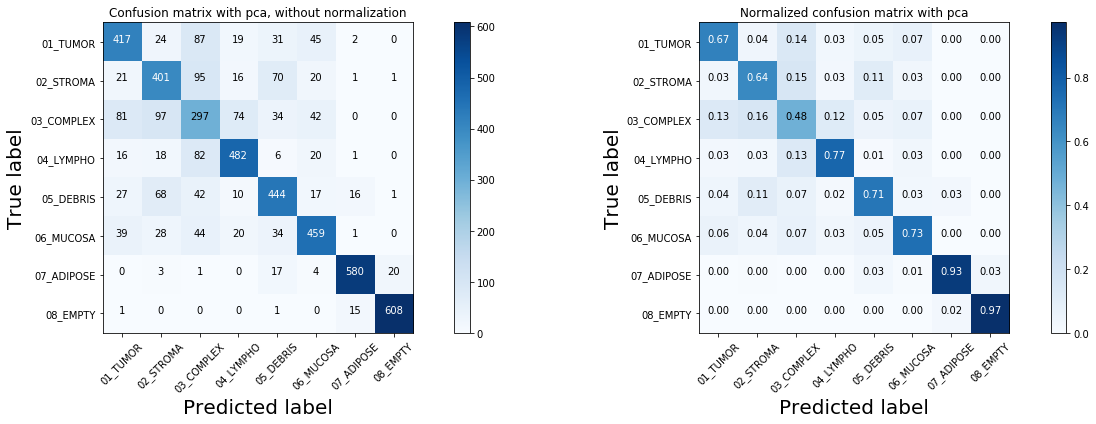

In [37]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat_pca, classes=class_names,
                      title='Confusion matrix with pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix with pca')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_dtc_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier

# RFC
RFC = RandomForestClassifier()

ti_rfc = time.time()

# data -> original dfmap no pca
scores = cross_val_score(RFC, features_arr, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred = cross_val_predict(RFC,features_arr, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat = confusion_matrix(labels_arr,y_pred)

tf_rfc = time.time()
tt_rfc = tf_rfc - ti_rfc


ti_rfc_pca = time.time()

# data -> original dfmap pca
scores_pca = cross_val_score(RFC, features_arr_pca, labels_arr, cv=cv_skf, n_jobs = -1)
# conf matrix
y_pred_pca = cross_val_predict(RFC,features_arr_pca, labels_arr,cv=cv_skf, n_jobs = -1)
conf_mat_pca = confusion_matrix(labels_arr,y_pred_pca)

tf_rfc_pca = time.time()
tt_rfc_pca = tf_rfc_pca - ti_rfc_pca

In [39]:
# calc time
print(time.strftime("%H:%M:%S", time.gmtime(tt_rfc))) # no pca
print(time.strftime("%H:%M:%S", time.gmtime(tt_rfc_pca))) # pca

00:00:15
00:00:03


In [40]:
print("Feature map sin reducción de dimensiones")
print()

for i, score in enumerate(scores):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores.mean()*100))

print()
print()

Feature map sin reducción de dimensiones

acc fold nº 1: 83.73
acc fold nº 2: 83.33
acc fold nº 3: 83.93
acc fold nº 4: 85.32
acc fold nº 5: 81.94
acc fold nº 6: 83.47
acc fold nº 7: 81.25
acc fold nº 8: 81.45
acc fold nº 9: 83.06
acc fold nº 10: 80.85

media obtenida: 82.83




In [41]:
print("Feature map con reducción de dimensiones")
print()

for i, score in enumerate(scores_pca):
    print("acc fold nº {0:d}: {1:.2f}".format(i+1,score*100))
    
print()
print("media obtenida: {0:.2f}".format(scores_pca.mean()*100))

Feature map con reducción de dimensiones

acc fold nº 1: 74.01
acc fold nº 2: 73.81
acc fold nº 3: 77.38
acc fold nº 4: 75.60
acc fold nº 5: 76.39
acc fold nº 6: 77.42
acc fold nº 7: 78.23
acc fold nº 8: 76.81
acc fold nº 9: 73.99
acc fold nº 10: 73.79

media obtenida: 75.74


In [42]:
# confusion matrix
conf_mat

array([[549,  16,  30,   4,   6,  18,   2,   0],
       [ 12, 466,  84,   4,  55,   4,   0,   0],
       [ 72,  91, 394,  38,  14,  16,   0,   0],
       [  5,   6,  75, 531,   2,   6,   0,   0],
       [ 33,  71,  26,   8, 467,  11,   9,   0],
       [ 24,  13,  40,  13,  17, 518,   0,   0],
       [  0,   2,   0,   0,   8,   1, 604,  10],
       [  0,   0,   0,   0,   1,   0,  11, 613]])

In [43]:
conf_mat_pca

array([[502,  18,  44,   8,  24,  28,   0,   1],
       [ 52, 415,  97,   7,  38,  11,   5,   0],
       [105, 127, 308,  45,  20,  19,   0,   1],
       [ 17,  15,  78, 505,   5,   5,   0,   0],
       [ 61,  84,  32,   9, 401,  22,  16,   0],
       [ 46,  28,  46,  27,  23, 455,   0,   0],
       [  2,   3,   1,   0,  15,   5, 586,  13],
       [  0,   0,   0,   0,   0,   1,   9, 615]])

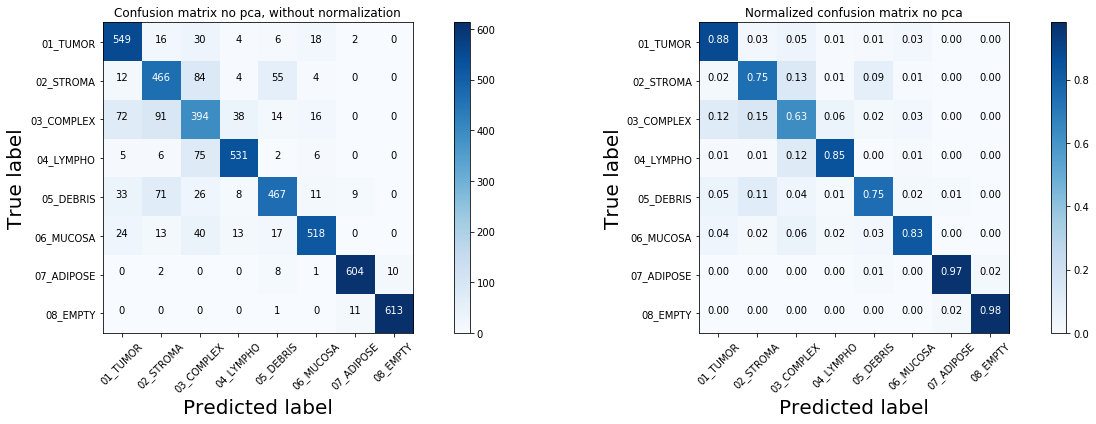

In [44]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat, classes=class_names,
                      title='Confusion matrix no pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat, classes=class_names, normalize=True,
                      title='Normalized confusion matrix no pca')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_rfc_no_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()

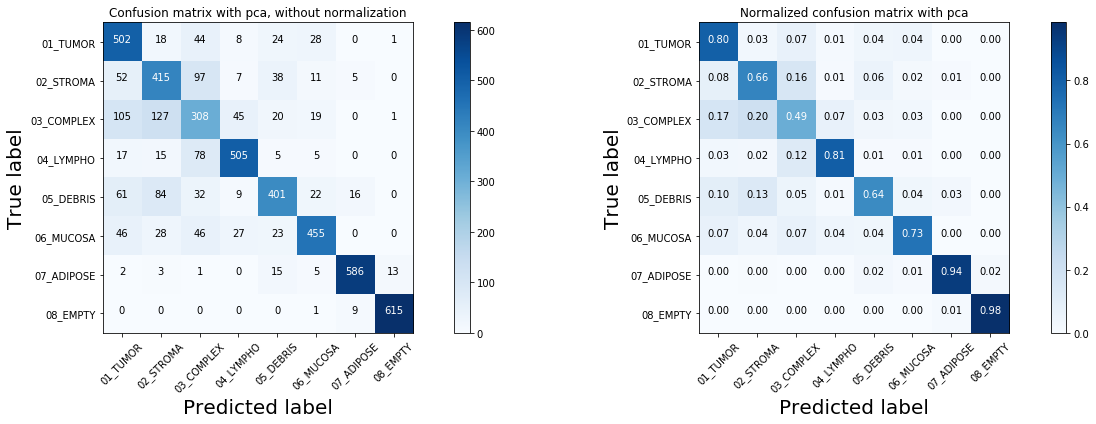

In [45]:
fig = plt.figure(figsize=(20, 6))


fig.add_subplot(1,2,1)
plot_confusion_matrix(conf_mat_pca, classes=class_names,
                      title='Confusion matrix with pca, without normalization')

fig.add_subplot(1,2,2)
plot_confusion_matrix(conf_mat_pca, classes=class_names, normalize=True,
                      title='Normalized confusion matrix with pca')

plt.savefig(os.path.join(PATH_TO_DF, "VGG19_rfc_pca.png"), bbox_inches='tight') # png 70kb vs jpg 135 kb

plt.show()